# 목차

-  Project1. 선형회귀 당뇨병 수치


    - Step (1) 데이터 가져오기
    - Step (2) 모델에 입력할 데이터 X 준비하기
    - Step (3) 모델에 예측할 데이터 y 준비하기
    - Step (4) train, test 데이터 분리
    - Step (5) 모델 준비하기
    - Step (6) 손실함수 loss 정의하기
    - Step (7) 기울기를 구하는 gradient 함수 구현하기
    - Step (8) 하이퍼 파라미터인 학습률 설정하기
    - Step (9) 모델 학습하기
    - Step (10) test 데이터에 대한 성능 확인하기
    - Step (11) 정답 데이터와 예측한 데이터 시각화하기

-  Project2.


    - Step (1) 데이터 가져오기
    - Step (2) (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
    - Step (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
    - Step (4) train, test 데이터 분리
    - Step (5) 모델 준비하기
    - Step (6) 손실함수 loss 정의하기
    - Step (7) 기울기를 구하는 gradient 함수 구현하기
    - Step (8) 하이퍼 파라미터인 학습률 설정하기
    - Step (9) 모델 학습하기
    - Step (10) test 데이터에 대한 성능 확인하기
    - Step (11) 정답 데이터와 예측한 데이터 시각화하기





- 회고

-----

# project1 : 선형회귀 당뇨병 수치

In [2]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes_data = diabetes.data
diabetes_label= diabetes.target

In [6]:
df_x = diabetes.data
df_y= diabetes.target

In [7]:
X= np.array(diabetes_data)
y= np.array(diabetes_label)

In [8]:
diabetes_df = pd.DataFrame(data=diabetes_data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
diabetes_df["label"] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, 
                                                    diabetes_label, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  353 , X_test 개수:  89


In [11]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [12]:
W

array([0.15746566, 0.07235194, 0.44067254, 0.348268  , 0.49114526,
       0.6000082 , 0.71805158, 0.41066085, 0.65064502, 0.53680786])

In [13]:
b

0.31048063064445797

In [14]:
# 모델함수 구현

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [15]:
# MSE

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [16]:
# 손실함수

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [17]:
# 그래디언트 계산

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [18]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.63750128  -13.86329953 -189.62729816 -142.69507969  -68.24347437
  -56.00532162  127.75961361 -139.07725314 -182.88795541 -123.54094216]
db: -303.64600706450295


In [19]:
# 학습률 설정 

LEARNING_RATE = 0.1

In [20]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4525.2301
Iteration 20 : Loss 3657.6162
Iteration 30 : Loss 3381.3434
Iteration 40 : Loss 3229.0236
Iteration 50 : Loss 3132.4621
Iteration 60 : Loss 3067.0270
Iteration 70 : Loss 3021.2424
Iteration 80 : Loss 2988.6679
Iteration 90 : Loss 2965.2453
Iteration 100 : Loss 2948.2623
Iteration 110 : Loss 2935.8542
Iteration 120 : Loss 2926.7202
Iteration 130 : Loss 2919.9448
Iteration 140 : Loss 2914.8795
Iteration 150 : Loss 2911.0617
Iteration 160 : Loss 2908.1599
Iteration 170 : Loss 2905.9351
Iteration 180 : Loss 2904.2138
Iteration 190 : Loss 2902.8694
Iteration 200 : Loss 2901.8091
Iteration 210 : Loss 2900.9643
Iteration 220 : Loss 2900.2839
Iteration 230 : Loss 2899.7299
Iteration 240 : Loss 2899.2736
Iteration 250 : Loss 2898.8932
Iteration 260 : Loss 2898.5722
Iteration 270 : Loss 2898.2980
Iteration 280 : Loss 2898.0607
Iteration 290 : Loss 2897.8528
Iteration 300 : Loss 2897.6684
Iteration 310 : Loss 2897.5028
Iteration 320 : Loss 2897.3524
Iteration 330 : L

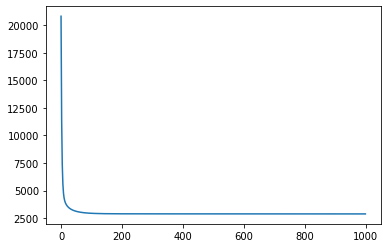

In [21]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [22]:
W, b

(array([  41.99824169, -240.26458125,  556.83006533,  342.96201472,
        -181.88965189,  -67.73978312, -175.49779109,  167.47627837,
         450.19650592,   54.06517073]), 151.30724717233232)

In [23]:
# test data :prediction 

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.5451006718554

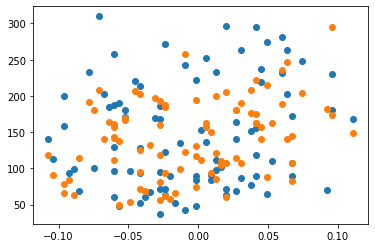

In [24]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#2. project2 : 날씨-자전거타기 

In [25]:
import seaborn as sns

* 1) 데이터가져오기

In [26]:
train = pd.read_csv('/content/train.csv')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* 2)datetime컬럼생성

In [28]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [29]:
from sklearn.utils.fixes import threadpool_info
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second

In [30]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [31]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

* 3) 데이터 개수 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

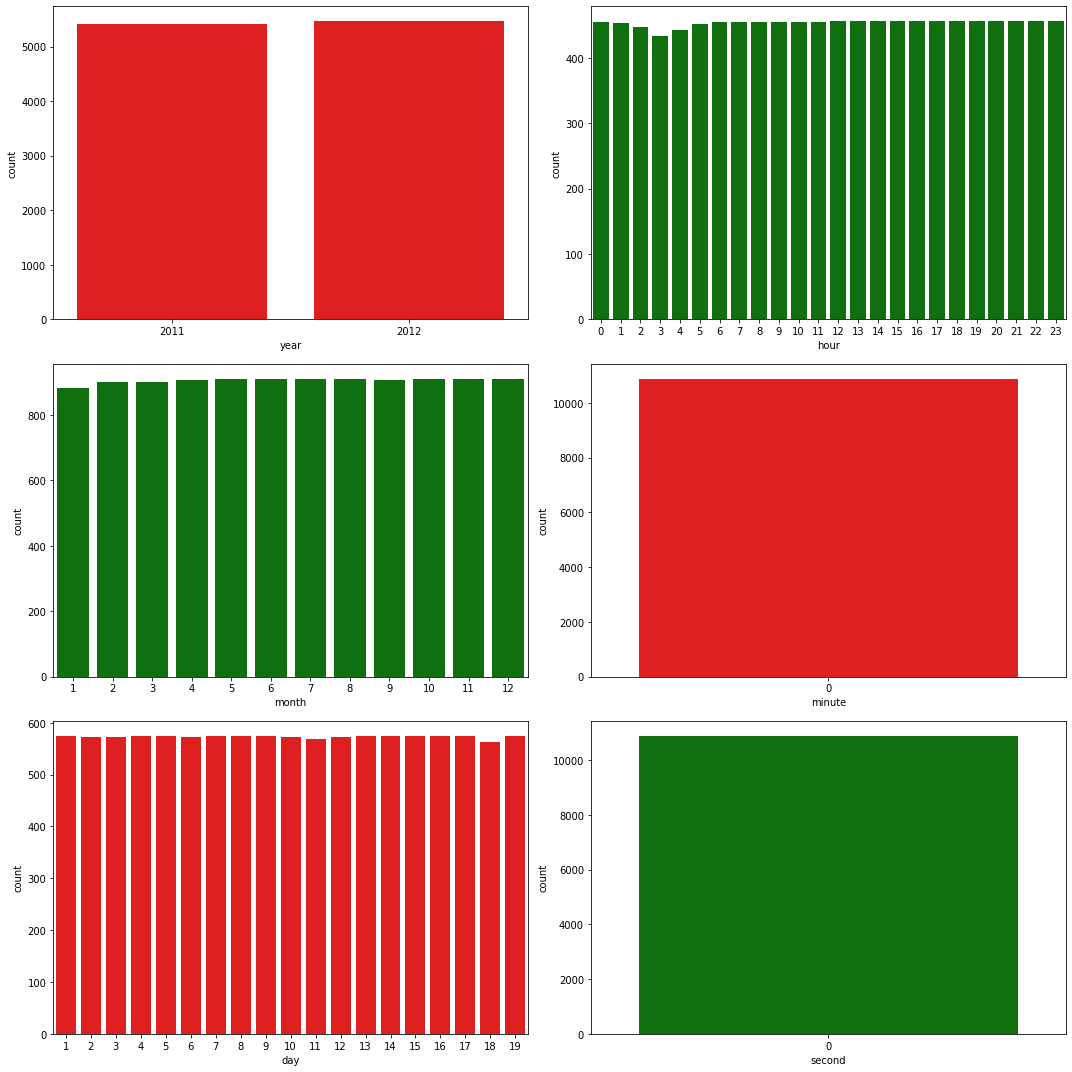

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(3, 2)
df = pd.DataFrame(dict(col1=np.linspace(1, 10, 5), col2=np.linspace(1, 10, 5)))


fig.set_figheight(15)
fig.set_figwidth(15)

sns.countplot(train.year, x='year', color="red", ax=axes[0][0])
sns.countplot(train.month, x="month", color="green", ax=axes[1][0])
sns.countplot(train.day, x='day', color="red", ax=axes[2][0])
sns.countplot(train.hour, x="hour", color="green", ax=axes[0][1])
sns.countplot(train.minute, x='minute', color="red", ax=axes[1][1])
sns.countplot(train.second, x="second", color="green", ax=axes[2][1])
plt.show()

* 4) X,y 컬럼 선택, train_test 데이터 분리

In [33]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 
       'year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values

print(X.shape)

(10886, 14)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  8708 , X_test 개수:  2178


* 5)LinearRegression 모델 학습

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

* 6) 예측값 출력 및 손실함수 계산

In [36]:
predictions = model.predict(X_test)
predictions

#MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


19945.370053754086

In [37]:
#rmse
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

141.22807813517142

* 7) 시각화하기

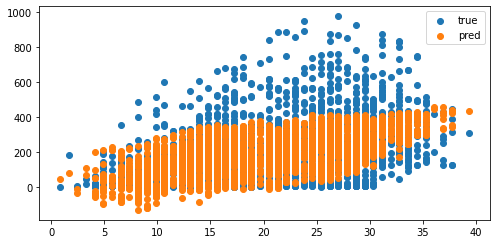

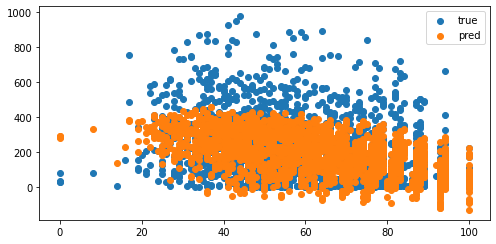

In [38]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()




plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.show()


# 회고



### - 이번 프로젝트에서 **어려웠던 점**.

 datetime 컬럼을 datetime 자료형으로 변환하여  새로운 6가지 컬럼 생성하는 것이 어려웠다. 
>to_datetime 활용 

 참고: https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/



### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

{알아낸점}

<회귀모델 평가지표>

* **MSE (Mean Squared Error)**

  실제 값 대비 예측값에 대한 제곱의 평균으로 구한다. 
MAE와 유사하지만, 절댓값 대신에 제곱 값을 사용하는 차이점이 있다. 
MAE와 유사하게 이상치가 발생할 경우, 제곱하기에 1 미만의 에러는 작아지고 1 이상의 에러는 더 커지는 한계점이 있다.



* **RMSE (Root Mean Squared Error)**
  MSE에 제곱근(root)를 통해 큰 차이의 에러를 덜 민감한 특징이 있다. 
동일한 계산 단위를 적용하는 MAE에 비해 RMSE를 사용하는 이유는 잔차를 제곱하고 다 더한 뒤 제곱근을 통해 큰 오류 값에 페널티를 부여해, 에러에 덜 민감한 장점이 있기 때문이다.

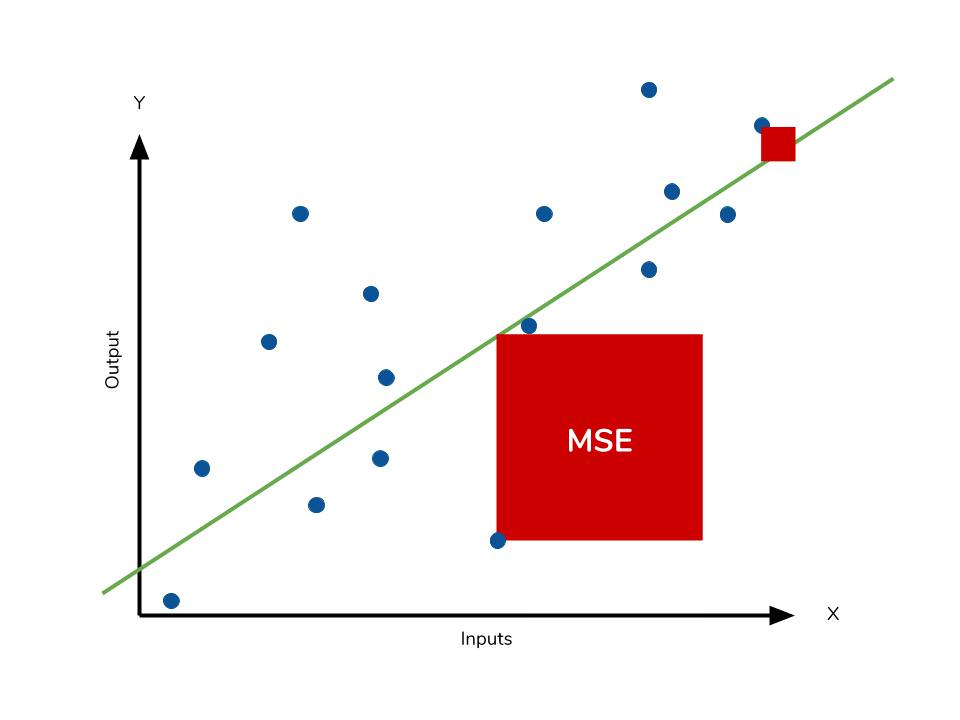



### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.


>#### **루브릭**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1|프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔다|MSE 손실함수값 3000 이하를 달성|
>|2|프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔다| RMSE 값 150 이하를 달성 |
>|3|시각화 요구사항이 정확하게 이루어졌다.|데이터개수 시각화 및 예측결과 시각화를 진행하였으며, 예측과 실제 데이터가 크게 분리되지 않고 비슷하다.|


### - 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.



### - **자기 다짐**

* 다양한 데이터 선형회귀 모델 적용해보기

### - **참고**
선형회귀 유튜브 : 
https://youtu.be/ve6gtpZV83E
https://youtu.be/LZe94nm1lZg
